In [51]:
#0 Importing library

import pandas as pd
import numpy as np
import math
import seaborn as sn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [52]:
#1 Loading Data 
def load_data():
    path =  'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
    cc_apps = pd.read_csv(path, header = None)
    return cc_apps

cc_apps = load_data()

In [53]:
#2 Analysis of descriptive statistics

def describe_data(data):
    print("Data description")
    
    print(data.describe())
    
    print('\n')

    print("Data Info")
    
    print(data.info())
    
    print('\n')
    
    print("Null values by columns")
    
    print(data.isnull().sum())
    
describe_data(cc_apps)

# Conlusions:
    #there is no null values in the data - possible problems

Data description
               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    

In [54]:
print(cc_apps.tail(20))
# there is definietly some question marks

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670  b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671  b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672  a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0

In [55]:
# counting '?' by column: 

def counter_function(data):
    counter = {}
    for row in data:
        if row not in counter:
            counter[row] = 0
        counter[row] += 1
    print(counter)

In [56]:
for n in range(16):
        counter_function(cc_apps[n])

{'b': 468, 'a': 210, '?': 12}
{'30.83': 1, '58.67': 1, '24.50': 6, '27.83': 5, '20.17': 3, '32.08': 2, '33.17': 5, '22.92': 4, '54.42': 1, '42.50': 1, '22.08': 4, '29.92': 1, '38.25': 2, '48.08': 2, '45.83': 1, '36.67': 3, '28.25': 3, '23.25': 5, '21.83': 3, '19.17': 6, '25.00': 6, '47.75': 1, '27.42': 2, '41.17': 4, '15.83': 2, '47.00': 1, '56.58': 1, '57.42': 1, '42.08': 1, '29.25': 2, '42.00': 2, '49.50': 1, '36.75': 3, '22.58': 3, '27.25': 4, '23.00': 5, '27.75': 2, '54.58': 1, '34.17': 4, '28.92': 2, '29.67': 2, '39.58': 2, '56.42': 1, '54.33': 1, '41.00': 2, '31.92': 2, '41.50': 1, '23.92': 3, '25.75': 3, '26.00': 1, '37.42': 1, '34.92': 2, '34.25': 2, '23.33': 2, '23.17': 3, '44.33': 2, '35.17': 4, '43.25': 2, '56.75': 1, '31.67': 2, '23.42': 3, '20.42': 7, '26.67': 4, '36.00': 1, '25.50': 1, '19.42': 3, '32.33': 4, '34.83': 3, '38.58': 2, '44.25': 2, '44.83': 1, '20.67': 6, '34.08': 3, '21.67': 2, '21.50': 3, '49.58': 1, '27.67': 5, '39.83': 1, '?': 12, '37.17': 1, '25.67': 4, 

In [57]:
# Deleting '?' with NaN
c_apps = cc_apps.replace('?', np.NaN)
describe_data(cc_apps)

Data description
               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    

In [58]:
# Dropping NA - the NaN doesn't represent that 
cc_apps = cc_apps.dropna()
describe_data(cc_apps)

Data description
               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    

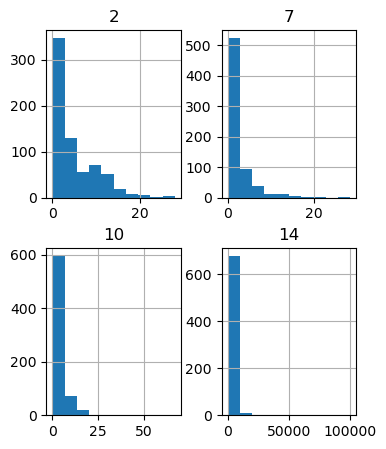

In [59]:
#2 Data Visualisation - viusual analysis of the results

#visualisation of the de

def my_hist_function(data):
    data.hist(bins=10, figsize=(4, 5))

my_hist_function(cc_apps)
# as we can see the data is highly inbalanced, in the future it may violate the modelling results # we need to logarithm it 



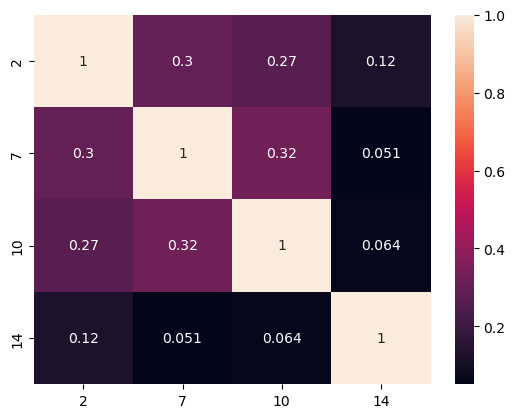

In [60]:
# Correlation function matrix

def correlation_matrix(data):
    corr_matrix = data.corr()
    sn.heatmap(corr_matrix, annot=True)
    plt.show()
    
correlation_matrix(cc_apps)

# We do not need to remove any variable as multilonearity is unlikely

In [61]:
# 3 Data transformation
print(cc_apps.dtypes)


0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object


In [62]:
for n in [2,7,10,14]:
    print(min(cc_apps[n]))

0.0
0.0
0
0


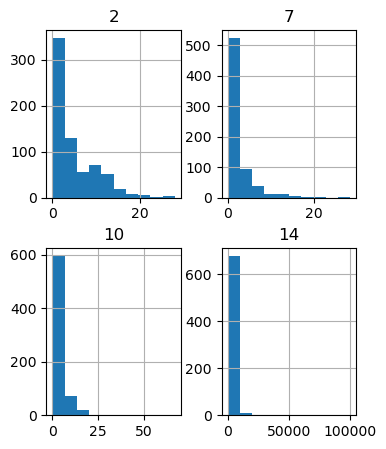

In [63]:
my_hist_function(cc_apps)

# we normalised it a little bit now we can proceed to model it mathematically

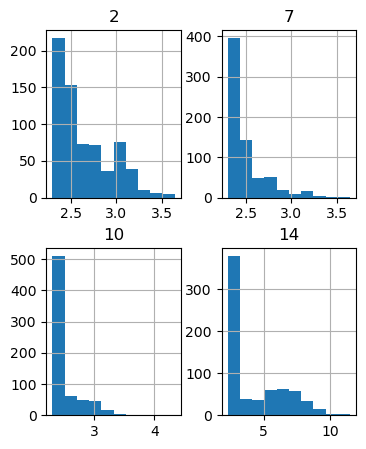

In [64]:
for n in [2,7,10,14]:
    cc_apps[n] = cc_apps[n] + 10
    cc_apps[n] = np.log(cc_apps[n])
my_hist_function(cc_apps)

# now we can proceed to model it

In [65]:
#4 Data pre-processing

# Dropping 11 and 13 - zip codes and driver license
cc_apps = cc_apps.drop([11, 13], axis=1)

In [66]:
# Dividing the data

cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

In [93]:
# Transforamcja zmiennych jakosciowych na zmienne dummies
def dummies(data):
    data = pd.get_dummies(data)


In [94]:
dummies(cc_apps_train)
dummies(cc_apps_test)

cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns,
                                    fill_value=0)

In [95]:
# Podział na zmienną zależną i zmienną niezależną
X_train, y_train = cc_apps_train.iloc[:, :-1].values, cc_apps_train.iloc[:, [-1]].values
X_test, y_test = cc_apps_test.iloc[:, :-1].values, cc_apps_test.iloc[:, [-1]].values


array([[0.17295317, 0.33821172, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18830171, 0.32238108, 0.2302562 , ..., 0.        , 0.        ,
        1.        ],
       [0.1083261 , 0.02247618, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.16483876, ..., 0.        , 0.        ,
        0.        ],
       [0.3142662 , 0.03350952, 0.08931988, ..., 0.        , 0.        ,
        0.        ]])

In [101]:
# tworzenie obiektu regresja
logreg = LogisticRegression()

# dopasowanie regresji
logreg.fit(X_train,y_train)


C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [103]:
# Import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)



Accuracy of logistic regression classifier:  1.0


array([[103,   0],
       [  0, 125]], dtype=int64)

In [98]:
# Import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)



In [99]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda_the_righ_one\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [100]:
# Pierwszy moduł
def czyPierwsza(n):
    if (n == 1 or n == 0):
        return False
    for i in range(2, n):
        if (n % i == 0):
            return False

    return True


def pierwsza(N):
    for i in range(1, N + 1):
        if(czyPierwsza(i)):
            print(i, end=" ")

In [89]:
#test
pierwsza(78)

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 